# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

# <span style="color:blue"> Svolgimento </span>

Per calcolare l'integrale applichiamo il principio dell'importance sampling: 
$$ \langle f(x) \rangle = \int_{a}^{b} f(x) \, dx = \int_{a}^{b} g(x)\rho (x) \, dx$$

L'errore sulla stima dell'integrale, effettuando $N$ misure, è dato da: $\epsilon = \frac{\sigma_I}{\sqrt{N}}$, dove $\sigma_I$ è la varianza della variabile $g(x_i)$.

La scelta della distribuzione di probabilità $\rho(x)$ influenza quindi la bontà della stima dell'integrale. L'importance sampling, tramite l'applicazione di un principio variazionale, permette di dimostrare che la stima è migliore tanto più $\rho(x)$ è simile alla funzione integranda.

Nell'esercizio stimiamo l'integrale utilizzando due diverse distribuzioni di probabilità. Nel primo caso utilizziamo una distribuzione uniforme, nel secondo utilizziamo la distribuzione $\rho(x)=2(1-x)$, ossia lo sviluppo di taylor centrato in $x_0 =1$ dell'integranda, arrestato al primo ordine e normalizzato a $1$. Come di consueto, la generazione di un numero pseudocasuale che segua la distribuzione $\rho(x)$ si può ottenere tramite l'inversa della cumulativa.

Si esegue infine il data blocking utilizzando $M=10^4$ lanci in $N=100$ blocchi.

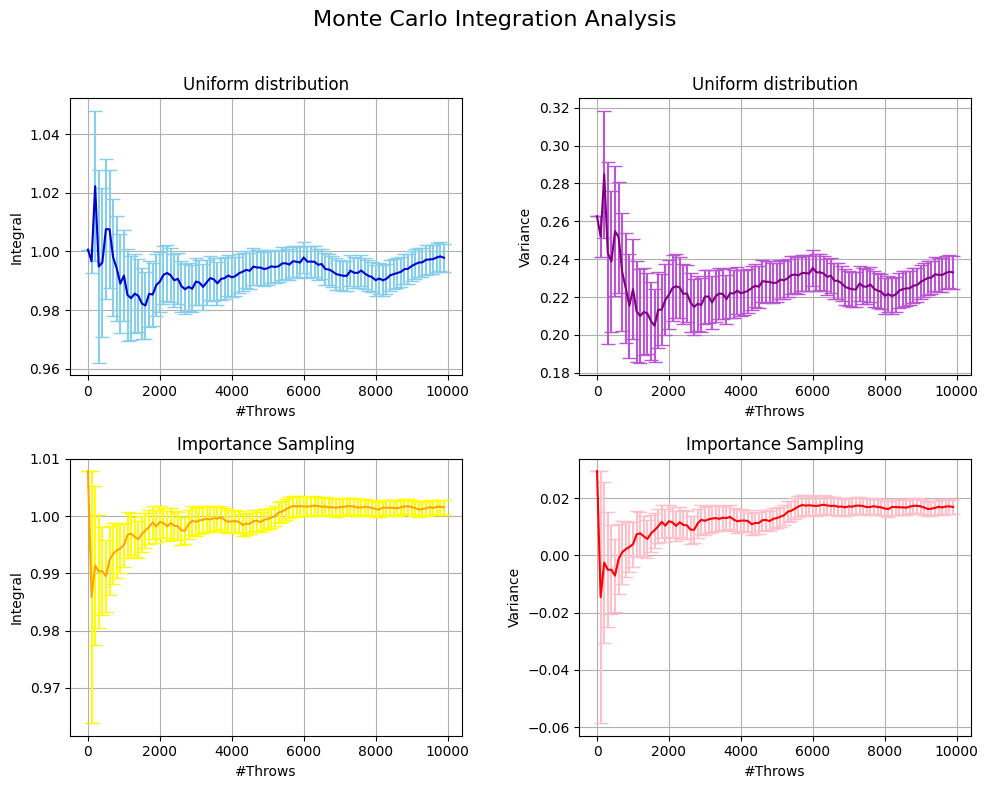

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
M = 10000             # Total number of throws
N = 100                # Number of blocks
n = int(M / N)          # Number of throws in each block

def leggi_dati_da_file(file_path):
    dati = []  # List to store objects with numerical data

    try:
        with open(file_path, 'r') as file:
            for line in file:
                valori = line.split()
                if len(valori) == 4:
                    dato1 = float(valori[0])
                    dato2 = float(valori[1])
                    dato3 = float(valori[2])
                    dato4 = float(valori[3])
                    dati.append((dato1, dato2, dato3, dato4))
                else:
                    print(f"Ignorata la riga con formato non valido: {line.strip()}")
    except FileNotFoundError:
        print(f"File '{file_path}' non trovato.")
    except ValueError:
        print(f"Errore nella conversione di un valore in '{file_path}'.")

    return dati

# Read data
file_da_leggere = 'Esercizio_02_1/Uniform_distribution.txt' 
dati_letti = leggi_dati_da_file(file_da_leggere)

dati_imp = np.loadtxt('Esercizio_02_1/Importance_sampling.txt') #funzione predefinita in python per leggere dati da file

# Check the loaded data
#print(f"Dati letti: {dati_letti}")

# Create x axis values based on the number of blocks
x = np.arange(len(dati_letti)) * n
z = np.arange(len(dati_imp)) * n

# Extract data for plots

#Uniform
mu = [item[0] for item in dati_letti]
err = [item[1] for item in dati_letti]
var = [item[2] for item in dati_letti]
err_var = [item[3] for item in dati_letti]

#Importance sampling
mu_imp = [item[0] for item in dati_imp]
err_imp = [item[1] for item in dati_imp]
var_imp = [item[2] for item in dati_imp]
err_var_imp = [item[3] for item in dati_imp]



# Check extracted data
#print(f"x: {x}")
#print(f"mu: {mu}")
#print(f"err: {err}")

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Monte Carlo Integration Analysis', fontsize=16)

# Plot Uniform
#Average
axs[0, 0].errorbar(x, np.array(mu), yerr=np.array(err).T, color='mediumblue', ecolor='skyblue', capsize=5)  #fmt='o',
axs[0, 0].set(xlabel='#Throws', ylabel='Integral')
axs[0, 0].set_title('Uniform distribution')
axs[0, 0].grid(True)

#Variance
axs[0, 1].errorbar(x, np.array(var), yerr=np.array(err_var).T, color='purple', ecolor='mediumorchid', capsize=5)  #fmt='o',
axs[0, 1].set(xlabel='#Throws', ylabel='Variance')
axs[0, 1].set_title('Uniform distribution')
axs[0, 1].grid(True)

# Plot Importance sampling
#Average
axs[1, 0].errorbar(z, np.array(mu_imp), yerr=np.array(err_imp).T, color='orange', ecolor='yellow', capsize=5)  #fmt='o',
axs[1, 0].set(xlabel='#Throws', ylabel= 'Integral')
axs[1, 0].set_title('Importance Sampling')
axs[1, 0].grid(True)

#Variance
axs[1, 1].errorbar(z, np.array(var_imp), yerr=np.array(err_var_imp).T, color='red', ecolor='pink', capsize=5)  #fmt='o',
axs[1, 1].set(xlabel='#Throws',ylabel= 'Variance')
axs[1, 1].set_title('Importance Sampling')
axs[1, 1].grid(True)

#Set y-axis limits
#plt.ylim(0.0, 0.1)

# Set y-axis tick labels
#plt.yticks(np.arange(3.139, 3.144, 0.01))

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.3, wspace=0.3)
#plt.legend()

# Show the plots
plt.show()


### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

# <span style="color:blue"> Svolgimento </span>

Il Random Walk (RW) rientra tra i processi di Markov, ossia è una catena di eventi dove l'ultimo dipende esclusivamente dal precedente. Ciò si traduce nel fatto che per conoscere le coordinate $(x_n,t_n)$ basta conoscere $(x_{n-1},t_{n-1})$.

Nell'esercizio si sono eguiti un RW discreto e uno continuo, per entrambi si è creato un vettore di tre componenti che immagazzinasse le coordinate dei punti.

Il caso discreto è costituito da un reticolo di passo unitario. Per estrarre uniformemente gli spostamenti, si sono generati dei numeri pseudocasualmente nell'intervallo $[0,6]$, suddiviso in 6 subintervalli uguali, in modo da permettere uno spostamento in avanti o in indietro lungo una delle 3 dimensioni, per un totale di $100$ passi.

Nel caso continuo, si sono estratti due numeri pseudocasuali $(\theta,\phi)$ distribuiti uniformemente lungo la sfera unitaria.  Si è prestata dunque particolare attenzione alla generazione dell'angolo polare, che risente della dipendenza dell'infinitesimo elemento di superficie sferica da $\theta$ stesso. $\theta$ e $\phi$ si ottengono con il solito metodo dell'inversione della funzione cumulativa.

Infine, per entrambi casi si esegue il data blocking con $M=10^4$ e $N=100$, e se ne riporta la sistanza percorsa in funzione del numero di passi $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ .


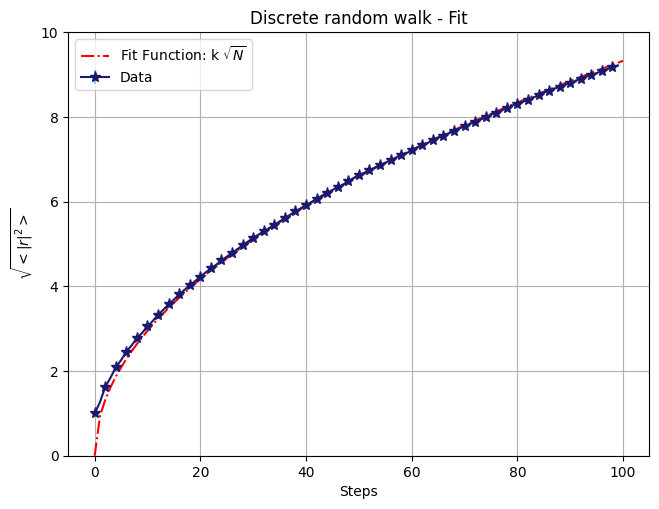

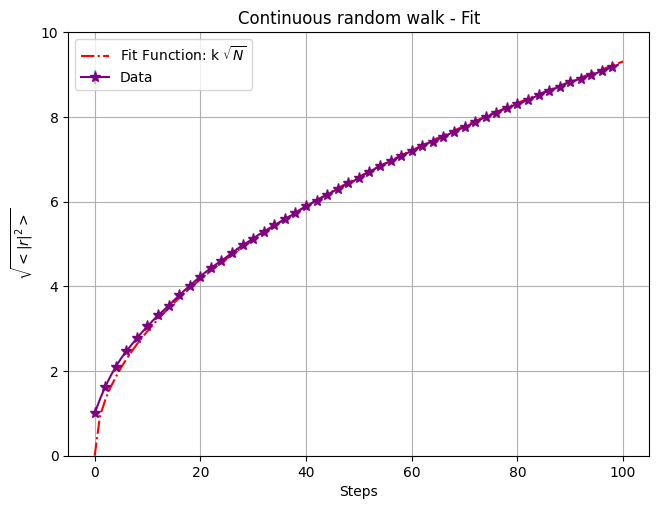

RW Discreto - Coefficients: [0.93248285]
RW Continuo - Coefficients: [0.93094781]


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

#Fit
def sqrt_func(x, k):
    return k * np.sqrt(x)

# Parameters
M = 10000             # Total number of throws
N = 100                # Number of blocks
n = int(M / N)          # Number of throws in each block

#Read data from a file
dati_DRW = np.loadtxt('Esercizio_02_2/DiscreteRW.txt') 
dati_CRW = np.loadtxt('Esercizio_02_2/ContinuousRW.txt') 

# Create x axis values based on the number of blocks
x = np.arange(len(dati_DRW)) # * n
z = np.arange(len(dati_CRW))

# Extract data for plots
ave_DRW = [item[0] for item in dati_DRW]
err_DRW = [item[1] for item in dati_DRW]
ave_CRW = [item[0] for item in dati_CRW]
err_CRW = [item[1] for item in dati_CRW]

# Plot DRW
fig1=plt.figure(figsize=(7.5, 5.5))
plt.errorbar(x, ave_DRW, err_DRW, color = 'midnightblue', ecolor='skyblue', marker='*', markersize=8, markevery=2, label='Data')
popt_DRW, _ = curve_fit(sqrt_func, x, ave_DRW)
x_fit = np.linspace(0, 100, 100)
y_fit = sqrt_func(x_fit, *popt_DRW)
plt.plot(x_fit, y_fit, color='red', linestyle='dashdot', label='Fit Function: k $\sqrt{N}$')
plt.xlabel('Steps')
plt.ylabel('$\sqrt{<|r|^2>}$')
plt.title('Discrete random walk - Fit')
plt.legend()
#Set y-axis limits
plt.ylim(0.0, 10.)
plt.grid(True)

# Plot CRW
fig2=plt.figure(figsize=(7.5, 5.5))
plt.errorbar(z, ave_CRW, err_CRW, color = 'Purple', ecolor='skyblue', marker='*', markersize=8, markevery=2, label='Data')
popt_CRW, _ = curve_fit(sqrt_func, z, ave_CRW)
x_fit = np.linspace(0, 100, 100)
y_fit = sqrt_func(x_fit, *popt_CRW)
plt.plot(x_fit, y_fit, color='red', linestyle='dashdot', label='Fit Function: k $\sqrt{N}$')
plt.xlabel('Steps')
plt.ylabel('$\sqrt{<|r|^2>}$')
plt.title('Continuous random walk - Fit')
plt.legend()
#Set y-axis limits
plt.ylim(0.0, 10.)
plt.grid(True)

plt.show()

# Stampa dei parametri dei fit
print('RW Discreto - Coefficients:', popt_DRW)
print('RW Continuo - Coefficients:', popt_CRW)